# Analyse des incendies en Europe (2006–2025)

Importation des bibliothèques 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style graphique 
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Reds_r")


Chargement des données


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
df = pd.read_csv("estimates-by-country_FRA_2006_2024.csv")


In [7]:
df.head()

,Year,Burned Area (ha),Number of Fires
0,2006,1751,12
1,2007,2631,12
2,2008,1694,8
3,2009,7974,16
4,2010,4653,9


In [8]:
print(df["Year"].min(), "→", df["Year"].max())
print(df["Year"].unique())


2006 → 2025
[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024 2025]


In [9]:
df.tail()         # pour voir les 5 dernières années
df.sample(10)     # pour un échantillon aléatoire
df                # affiche tout (à éviter si le fichier est très gros)


,Year,Burned Area (ha),Number of Fires
0,2006,1751,12
1,2007,2631,12
2,2008,1694,8
3,2009,7974,16
4,2010,4653,9
5,2011,4831,23
6,2012,3298,19
7,2013,891,9
8,2014,4667,26
9,2015,2046,15


Nettoyage

In [10]:
df.info()  # pour voir les types
df["Year"] = pd.to_datetime(df["Year"], format="%Y")  # conversion en datetime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              20 non-null     int64
 1   Burned Area (ha)  20 non-null     int64
 2   Number of Fires   20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


Évolution de la surface brûlée par an

In [11]:
print(df.columns)


Index(['Year', 'Burned Area (ha)', 'Number of Fires'], dtype='object')


In [12]:
df.rename(columns={
    "Burned Area (ha)": "BurnedArea",
    "Number of Fires": "NumberOfFires"
}, inplace=True)


In [13]:
y="BurnedArea"


In [14]:
print(df.columns.tolist())


['Year', 'BurnedArea', 'NumberOfFires']


C:\Users\tatia\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


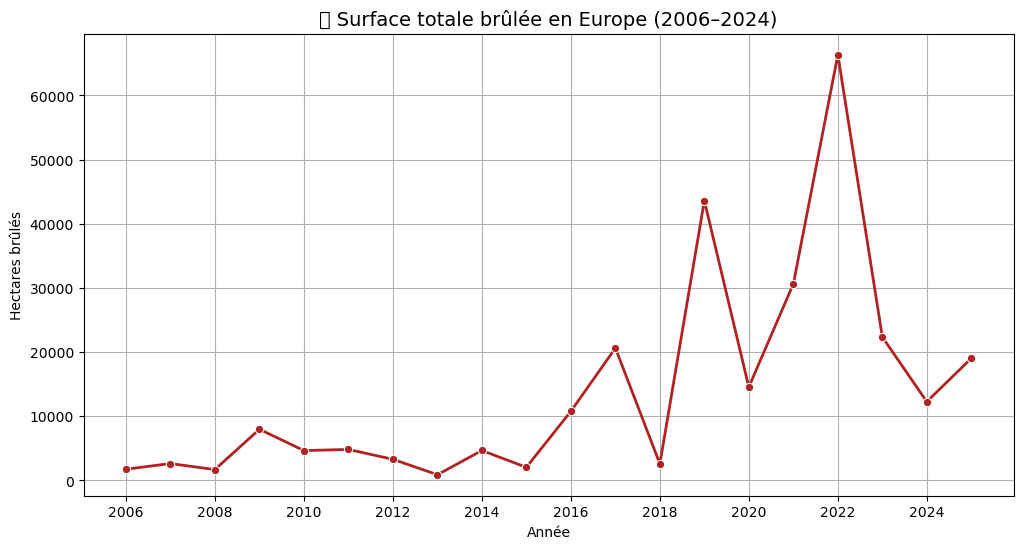

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(12, 6))

# Tracé de la surface brûlée
sns.lineplot(
    x="Year",
    y="BurnedArea",
    data=df,
    marker="o",
    linewidth=2,
    color="firebrick"
)

# Mise en forme
plt.title("🔥 Surface totale brûlée en Europe (2006–2024)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Hectares brûlés")
plt.grid(True)
plt.show()


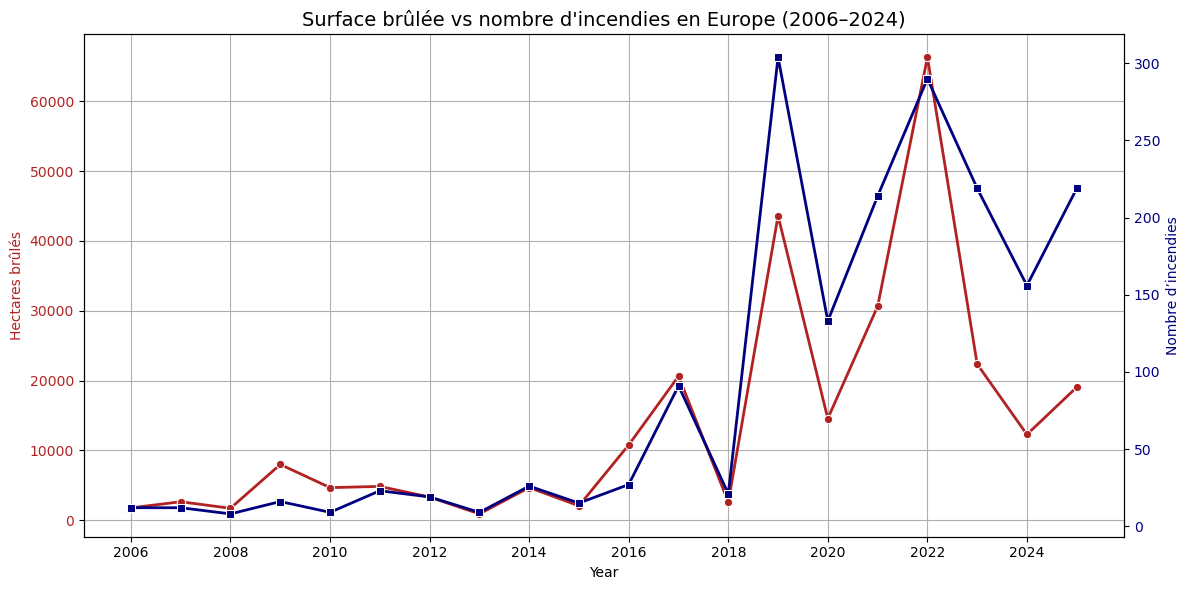

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Surface brûlée (axe gauche)
sns.lineplot(x="Year", y="BurnedArea", data=df, marker="o",
             linewidth=2, color="firebrick", ax=ax1)
ax1.set_ylabel("Hectares brûlés", color="firebrick")
ax1.tick_params(axis="y", labelcolor="firebrick")

# Nombre d’incendies (axe droit)
ax2 = ax1.twinx()
sns.lineplot(x="Year", y="NumberOfFires", data=df, marker="s",
             linewidth=2, color="navy", ax=ax2)
ax2.set_ylabel("Nombre d’incendies", color="navy")
ax2.tick_params(axis="y", labelcolor="navy")

# Titres 
plt.title("Surface brûlée vs nombre d'incendies en Europe (2006–2024)", fontsize=14)
ax1.grid(True)
fig.tight_layout()
plt.show()


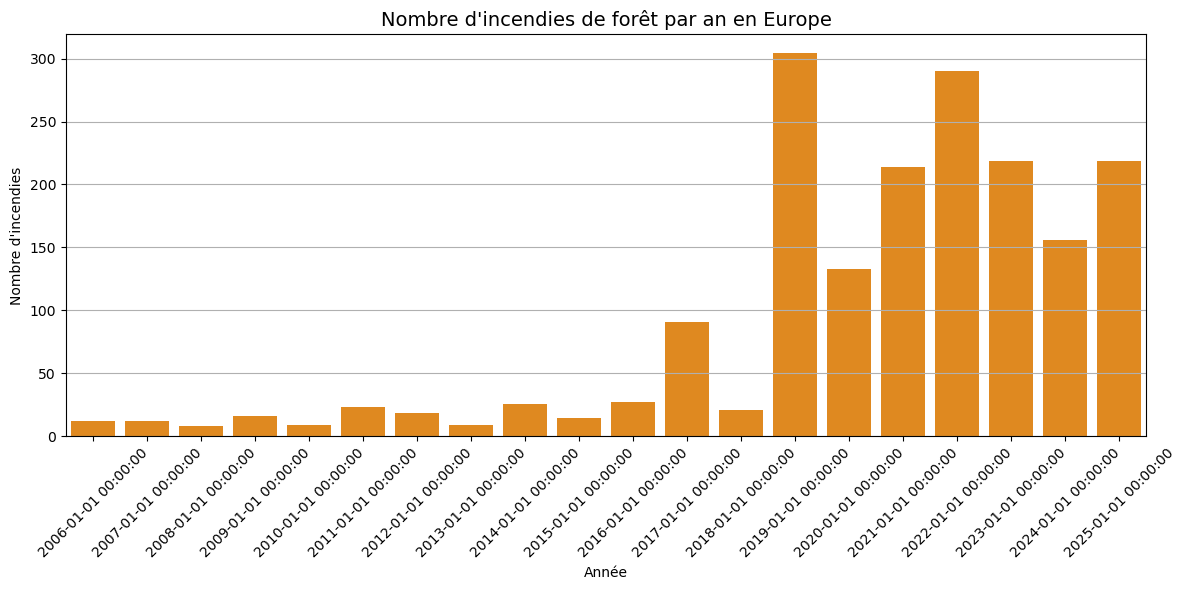

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x="Year",
    y="NumberOfFires",
    data=df,
    color="darkorange"
)
plt.title("Nombre d'incendies de forêt par an en Europe", fontsize=14)
plt.ylabel("Nombre d'incendies")
plt.xlabel("Année")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Calcul d'indicateur par 1000 hectares des cinq(5) derniéres années (2021-2025)


In [24]:
df["Fires_per_1000ha"] = df["NumberOfFires"] / (df["BurnedArea"] / 1000)


In [25]:
print(df[["Year", "Fires_per_1000ha"]].tail())


         Year  Fires_per_1000ha
15 2021-01-01          6.981600
16 2022-01-01          4.371618
17 2023-01-01          9.798658
18 2024-01-01         12.716009
19 2025-01-01         11.494856


- En 2022, on observe une forte baisse du ratio : il y a moins d'incendies pour une superficie plus importante brûlée, ce qui indique des incendies potentiellement plus vastes et possiblement moins maîtrisés.

- En 2024 et 2025, on note une hausse du nombre d'incendies pour la même superficie brûlée, ce qui pourrait suggérer soit une augmentation des foyers d'incendie, soit une gestion plus efficace des incendies (de plus petite envergure), ou des circonstances propices à l'extension rapide de plusieurs feux.

- Pour l'année 2021, le taux est constant et raisonnable (environ 7 incendies pour une superficie de 1 000 ha), servant ainsi de moyenne référentielle pour cette période.

Visualisation graphique des ratios de 2006-2025


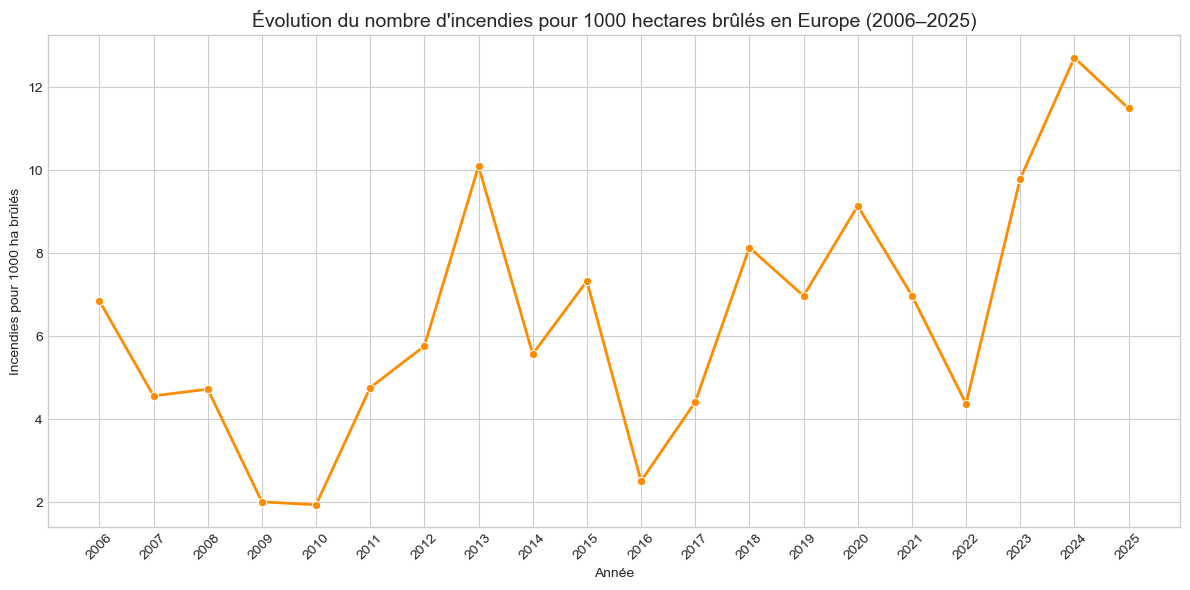

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Year"] = pd.to_datetime(df["Year"]).dt.year

plt.figure(figsize=(12,6))
sns.lineplot(
    x="Year",
    y="Fires_per_1000ha",
    data=df,
    marker="o",
    linewidth=2,
    color="darkorange"
)
plt.title("Évolution du nombre d'incendies pour 1000 hectares brûlés en Europe (2006–2025)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Incendies pour 1000 ha brûlés")
plt.grid(True)
plt.xticks(range(df["Year"].min(), df["Year"].max() + 1), rotation=45)
plt.tight_layout()
plt.show()


Corrélation entre feux et surface

C:\Users\tatia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


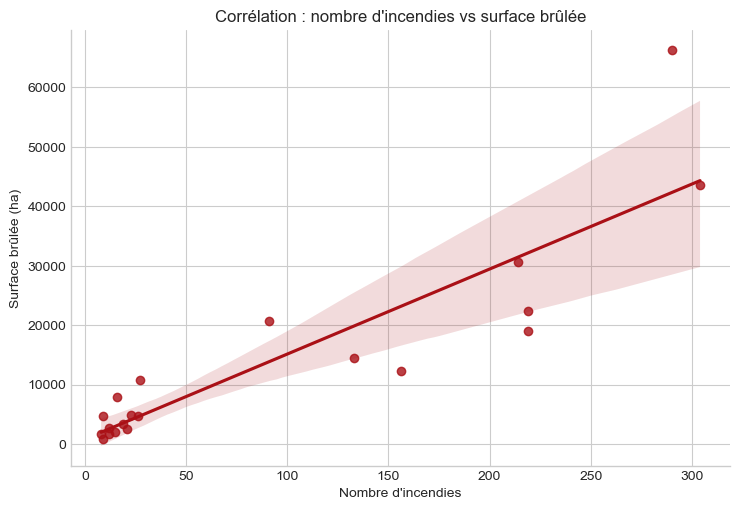

In [31]:
sns.lmplot(data=df, x="NumberOfFires", y="BurnedArea", aspect=1.5)
plt.title("Corrélation : nombre d'incendies vs surface brûlée")
plt.xlabel("Nombre d'incendies")
plt.ylabel("Surface brûlée (ha)")
plt.show()


In [32]:
plt.savefig("surface-brulee.png", dpi=300)


<Figure size 640x480 with 0 Axes>

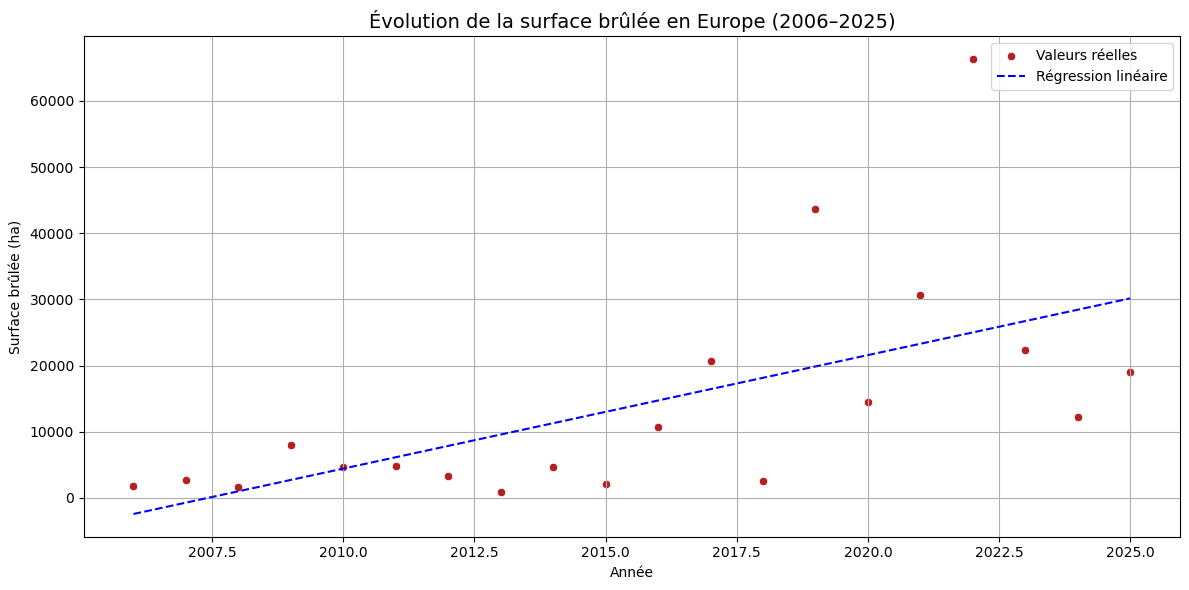

🔥 Prédiction surface brûlée en 2025 : 30158 hectares


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


df["Year"] = pd.to_datetime(df["Year"]).dt.year  

# Préparation des données
X = df["Year"].values.reshape(-1, 1)  
y = df["BurnedArea"].values

# Régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Visualisation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Year"], y=y, color="firebrick", label="Valeurs réelles")
plt.plot(df["Year"], y_pred, color="blue", linestyle="--", label="Régression linéaire")
plt.title("Évolution de la surface brûlée en Europe (2006–2025)", fontsize=14)
plt.xlabel("Année")
plt.ylabel("Surface brûlée (ha)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("🔥 Prédiction surface brûlée en 2025 :", int(model.predict([[2025]])[0]), "hectares")
